In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Testing: T-test

# Load Dataframes

**top_zipcodes:** containing the zipcodes with the most airbnbs in nyc. This dataframe only has the top 5 for each borough. The timespan for our airbnb data set is from the years [2015 - 2022]


The most notable columns are as follows:

- year - int64: year in which the airbnb count for a zipcode/borough was aggregated for
- count- int64: number of airbnbs within a zipcode/borough
- home_value - float64: the mean home value for the zipcode/borough area for the same year

In [2]:
top_zipcodes = pd.read_csv("./zipcode_data/mapped_data/top_zipcodes_home_val_mapped.csv")
top_zipcodes = top_zipcodes.dropna(how='any',axis=0) 
display(top_zipcodes.info())
display(top_zipcodes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zipcode     25 non-null     int64  
 1   borough     25 non-null     object 
 2   year        25 non-null     int64  
 3   count       25 non-null     int64  
 4   home_value  25 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


None

,zipcode,borough,year,count,home_value
0,10469,BRONX,2022,122,592184.800000
1,10466,BRONX,2022,119,560980.300000
2,10463,BRONX,2018,105,357383.416667
3,10466,BRONX,2021,99,528377.083333
4,10456,BRONX,2022,98,454902.900000


In [3]:
def generate_charts(data):
    sns.barplot(data=data, x="borough", y="count", hue="year", errorbar=None)
    plt.show()
    sns.boxplot(data=data, x="borough", y="home_value")
    plt.show()

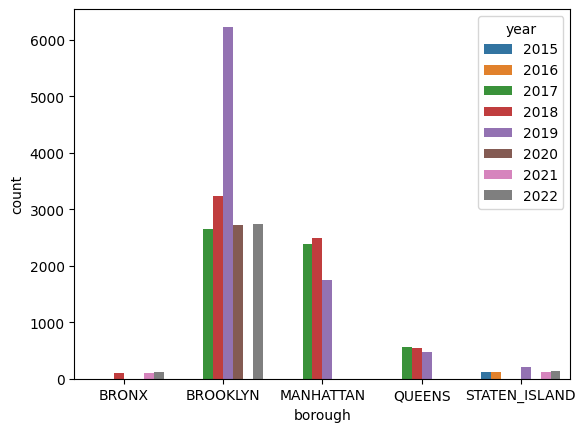

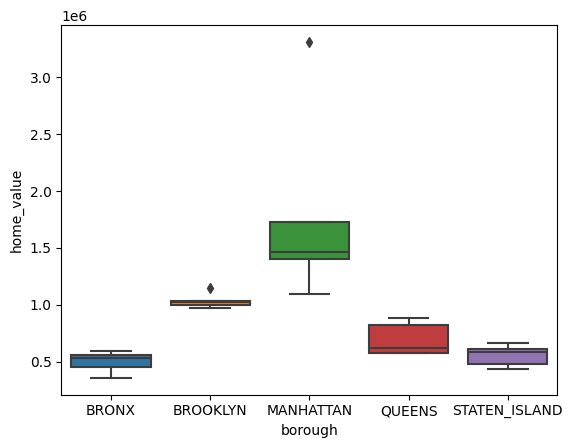

In [4]:
generate_charts(top_zipcodes)

**remaining_zipcodes** containing the remaining zipcode excluding the **top_zipcodes** for each borough. This data set contaings only the remaing zipcodes that are not part of the top 5 zipcodes throughout nyc. The timespan for our airbnb data set is from the years [2015 - 2022]


The most notable columns are as follows:

- year - int64: year in which the airbnb count for a zipcode/borough was aggregated for
- count- int64: number of airbnbs within a zipcode/borough
- home_value - float64: the mean home value for the zipcode/borough area for the same year

In [5]:
remaining_zipcodes = pd.read_csv("./zipcode_data/mapped_data/remaining_zipcodes_home_val_mapped.csv")
remaining_zipcodes = remaining_zipcodes.dropna(how='any',axis=0) 
display(top_zipcodes.info())
display(remaining_zipcodes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zipcode     25 non-null     int64  
 1   borough     25 non-null     object 
 2   year        25 non-null     int64  
 3   count       25 non-null     int64  
 4   home_value  25 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


None

,zipcode,borough,year,count,home_value
0,10001,MANHATTAN,2015,350,2.280604e+06
1,10001,MANHATTAN,2016,666,2.369453e+06
2,10001,MANHATTAN,2017,418,2.271804e+06
3,10001,MANHATTAN,2018,491,2.351997e+06
4,10001,MANHATTAN,2019,275,2.380720e+06


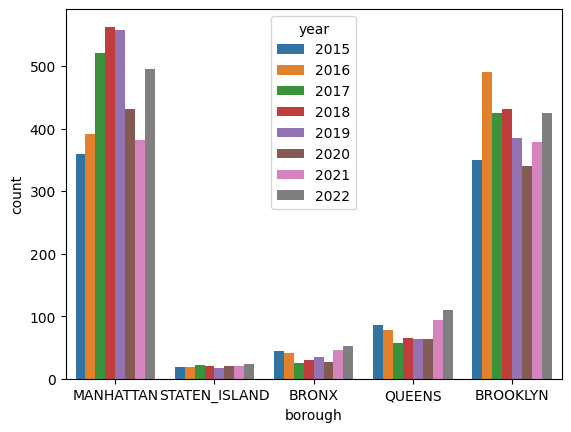

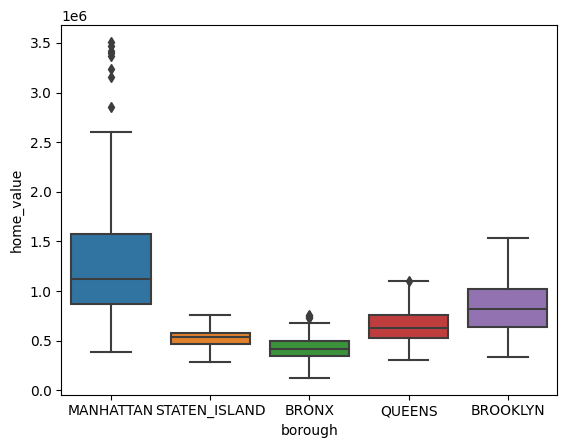

In [6]:
generate_charts(remaining_zipcodes)

#### Conducting t-test on NYC home values
In this section we will be conducting a generalized t test over the 5 boroughs throughout NYC 
[2015-2022]

This includes the following:
- 5_zipcodes_with_most_airbnb_NYC vs remaining_zipcodes_NYC

One thing to note is that within our `conduct_boro_ttest` helper function, within the statistical function `pg.ttest`, we are passing in the argument `correction=False` this so that the Welches t-test will be conducted by not taking into consideration the homogeneity assumption. The reason is because our nyc data set's `home_value` is shared accross all borough's of nyc and would not make sense because each borough has different price points for home values.

In [7]:
# Generalized helper function to conduct t-test
def conduct_boro_ttest(top_zipcodes, remaining_zipcodes, boro=None):
    if boro:
        top_zipcodes = top_zipcodes[top_zipcodes["borough"] == boro]
        remaining_zipcodes = remaining_zipcodes[remaining_zipcodes["borough"] == boro]
        print("T test for: {}".format(boro))
    correction = True if boro != None else False 
    return pg.ttest(top_zipcodes["home_value"], remaining_zipcodes["home_value"], correction=False)

In [8]:
print("T test for: NYC")
conduct_boro_ttest(top_zipcodes, remaining_zipcodes, None)

T test for: NYC


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.256491,1319,two-sided,0.20916,"[-65610.21, 299388.3]",0.25371,0.427,0.241247


##### Results

Based on the t-test results above, we end up with a p-value of 0.20 which is 0.05. This means that there is no significant difference between the mean home values of the zipcodes in heavily populated airbnbs (top 5) compared to the remaining zipcodes in nyc.

While this may seem like a devasting outcome, this outcome provides us an opportunity to ask more questions regarding our data.

One of the things we decided to embark on was to perform t-tests on a per borough basis. This means that we would be comparing the top zipcodes for each borough with their respective remaining zipcodes. For instance, the home_value distribution for MANHATTAN would not be the same for the BRONX. By focusing on an individual borough basis we are able to compare 2 groups that come from similar environments.

#### Conducting t-test on individual borough home values
In this section we will be conducting a t test for each individual borough throughout NYC 
[2015-2022]

This includes the following:
- 5_zipcodes_with_most_airbnb_BRONX vs remaining_zipcodes_BRONX
- 5_zipcodes_with_most_airbnb_BROOKLYN vs remaining_zipcodes_BROOKLYN
- 5_zipcodes_with_most_airbnb_QUEENS vs remaining_zipcodes_QUEENS
- 5_zipcodes_with_most_airbnb_MANHATTAN vs remaining_zipcodes_MANHATTAN
- 5_zipcodes_with_most_airbnb_STATEN_ISLAND vs remaining_zipcodes_STATEN_ISLAND

In [9]:
boros = ["BRONX", "BROOKLYN", "QUEENS", "MANHATTAN", "STATEN_ISLAND"]
for boro in boros:
    display(conduct_boro_ttest(top_zipcodes, remaining_zipcodes, boro))
    print(end="\n\n")

T test for: BRONX


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.37646,190,two-sided,0.170299,"[-32675.17, 183584.42]",0.623747,0.77,0.277877




T test for: BROOKLYN


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.386516,294,two-sided,0.16664,"[-75105.17, 433232.66]",0.625373,0.776,0.282056




T test for: QUEENS


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.612269,444,two-sided,0.540673,"[-95650.96, 182216.92]",0.275363,0.453,0.093737




T test for: MANHATTAN


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.717656,290,two-sided,0.086927,"[-72532.87, 1067150.58]",0.774822,1.121,0.402189




T test for: STATEN_ISLAND


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.713218,93,two-sided,0.477497,"[-54245.11, 115048.3]",0.327701,0.481,0.108745


##### Results

For each borough, we ended up with p-values greater than 0.05. This means that for each of our boroughs there is no significant difference between the mean home values of the zipcodes in heavily populated airbnbs (top 5) compared to the remaining zipcodes.

With these results in mind, we have come up with other alternatives in conducting future t-tests such as:

- T-test for nyc for an individual year 
- Borough basis for each individual year
